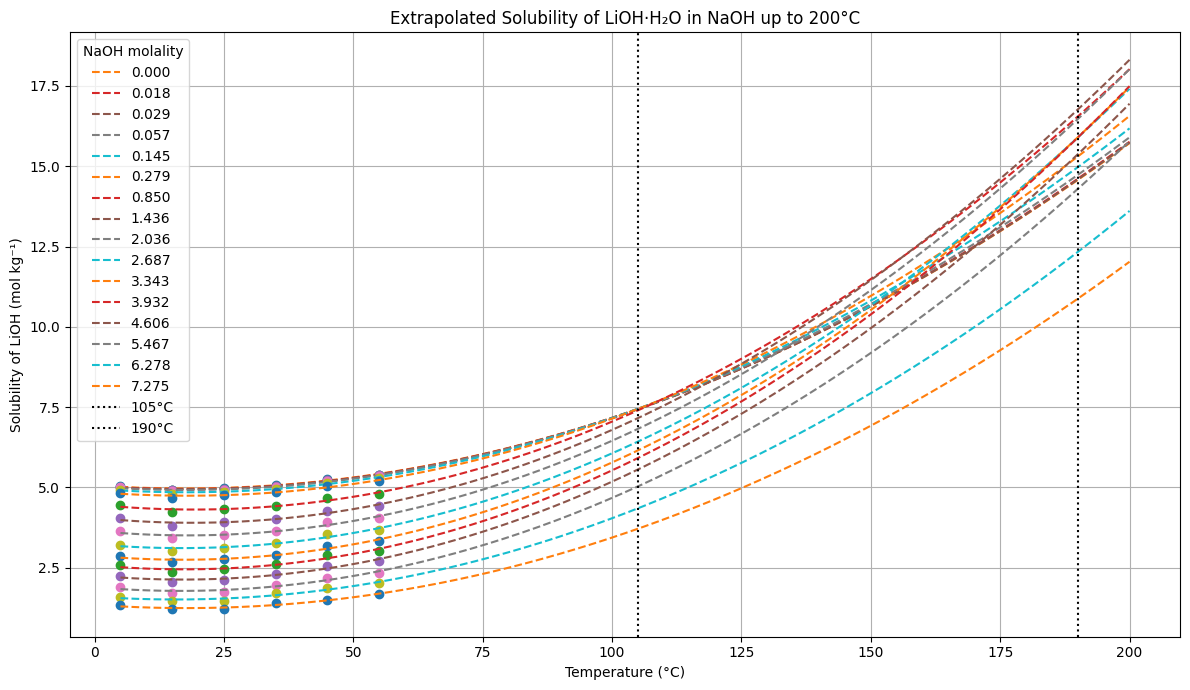

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('./data/LiOH_Solubility_NaOH.csv')

# Original temperature points (in °C)
temperatures = np.array([5, 15, 25, 35, 45, 55])

# Range of temperatures for extrapolation (5°C to 200°C)
temp_extrapolated = np.linspace(5, 200, 300)

# Plot: Experimental + Extrapolated Solubility
plt.figure(figsize=(12, 7))

for index, row in df.iterrows():
    m_NaOH = row['m_NaOH']
    m_values = np.array([row[f"{T}_m"] for T in temperatures])

    # Fit polynomial to the solubility data
    coeffs = np.polyfit(temperatures, m_values, deg=2)  # Quadratic fit
    poly = np.poly1d(coeffs)

    # Predict solubility over extended range
    extrapolated_m = poly(temp_extrapolated)

    # Plot original data points
    plt.plot(temperatures, m_values, 'o', label='')

    # Plot extrapolated fit
    plt.plot(temp_extrapolated, extrapolated_m, '--',
             label=f'{m_NaOH:.3f}')

plt.axvline(x=105, color='black', linestyle=':', label='105°C')
plt.axvline(x=190, color='black', linestyle=':', label='190°C')


plt.title('Extrapolated Solubility of LiOH·H₂O in NaOH up to 200°C')
plt.xlabel('Temperature (°C)')
plt.ylabel('Solubility of LiOH (mol kg⁻¹)')
plt.legend(title='NaOH molality', fontsize=10, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()